In [1]:
from pytmd_get_tide_elevation_current import get_pytmd_tide_timeseries

import datetime
import matplotlib.pyplot as plt

import pandas as pd

import xarray as xr

In [2]:
##########################################################################################

In [3]:
# compare with pytmd_script_get_tide_elevation_timeseries.ipynb

lat_to_predict = 79.029
lon_to_predict = 11.178

start_day_to_predict = datetime.datetime(2023, 7, 10, 0, 0, 0, tzinfo=datetime.timezone.utc)
number_of_hours_to_predict = 24*8
list_datetimes_to_predict = [start_day_to_predict + datetime.timedelta(hours=hr) for hr in range(number_of_hours_to_predict)]

dict_results = get_pytmd_tide_timeseries(list_datetimes_to_predict, lat_to_predict, lon_to_predict)

tidal constituents used in the present model are: list_time_constituents = ['m2', 's2', 'k1', 'o1', 'n2', 'p1', 'k2', 'q1']


In [4]:
dict_results.keys()

dict_keys(['list_datetimes', 'tide_meters', 'tide_current_u_cm_per_s', 'tide_current_v_cm_per_s'])

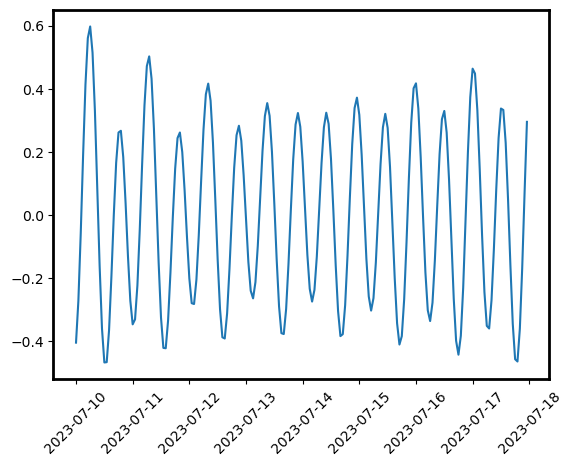

In [5]:
plt.figure()
plt.plot(dict_results["list_datetimes"], dict_results["tide_meters"])
plt.xticks(rotation=45)
plt.show()

In [6]:
# put in pandas for more flexible plotting later on
df_pytmd = pd.DataFrame({'utc_timestamp':dict_results["list_datetimes"], 'pytmd_tide_m':dict_results["tide_meters"]})

In [7]:
# read; note that I added a line "timestamp observation astronomical_tide" under the line 15 (i.e. new line 16) to have easy parsing with pandas
df_kartverket = pd.read_csv("./data_Kartverket_NyAlesund_Juni_2023.txt", skiprows=15, delimiter=r"\s+")  # parse ignoring file header and considering several spaces in a row as a single space
df_kartverket["utc_timestamp"] = pd.to_datetime(df_kartverket["timestamp"], utc=True)  # actually get UTC timestamps out of the ISO datetime strings
df_kartverket["kartverket_astronomical_tide_m"] = df_kartverket["astronomical_tide"] / 100.0  # cm (Kartverket) to m
df_kartverket["kartverket_observation_m"] = df_kartverket["observation"] / 100.0  # cm (Kartverket) to m

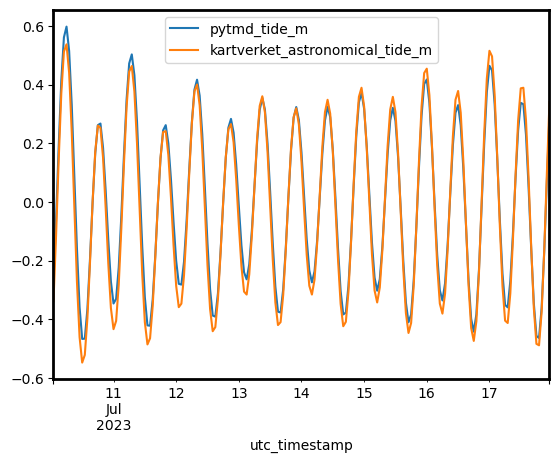

In [8]:
# compare the model data generated by pyTMD to Kartverket astronomical tide computed over a long time series

# time window to plot for comparison
utc_timestamp_start = datetime.datetime(2023, 7, 10, 0, 0, 0, tzinfo=datetime.timezone.utc)
utc_timestamp_stop = datetime.datetime(2023, 7, 18, 0, 0, 0, tzinfo=datetime.timezone.utc)

def get_mask(df_in, utc_timestamp_start, utc_timestamp_stop):
    mask = (df_in["utc_timestamp"] > utc_timestamp_start) & (df_in["utc_timestamp"] < utc_timestamp_stop) 
    return mask

# plotting
fig = plt.figure()
ax = plt.gca()

mask_pytmd = get_mask(df_pytmd, utc_timestamp_start, utc_timestamp_stop)
df_pytmd.loc[mask_pytmd].plot(x="utc_timestamp", y="pytmd_tide_m", ax=ax)

mask_kartverket = get_mask(df_kartverket, utc_timestamp_start, utc_timestamp_stop)
# df_kartverket.loc[mask_kartverket].plot(x="utc_timestamp", y=["observation_m", "kartverket_astronomical_tide_m"], ax=ax)
df_kartverket.loc[mask_kartverket].plot(x="utc_timestamp", y=["kartverket_astronomical_tide_m"], ax=ax)

plt.savefig("NyAlesund.png")

plt.show()

In [9]:
##########################################################################################

In [10]:
# compare with pytmd_script_get_tide_current_timeseries.ipynb

lat_to_predict = 72.502
lon_to_predict = 19.560

start_day_to_predict = datetime.datetime(2008, 9, 10, 0, 0, 0, tzinfo=datetime.timezone.utc)
number_of_hours_to_predict = 24*8
list_datetimes_to_predict = [start_day_to_predict + datetime.timedelta(hours=hr) for hr in range(number_of_hours_to_predict)]

dict_results = get_pytmd_tide_timeseries(list_datetimes_to_predict, lat_to_predict, lon_to_predict)

tidal constituents used in the present model are: list_time_constituents = ['m2', 's2', 'k1', 'o1', 'n2', 'p1', 'k2', 'q1']


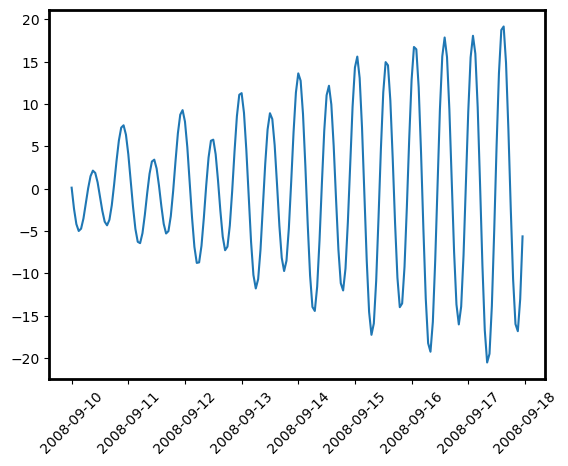

In [11]:
plt.figure()
plt.plot(dict_results["list_datetimes"], dict_results["tide_current_u_cm_per_s"])
plt.xticks(rotation=45)
plt.show()

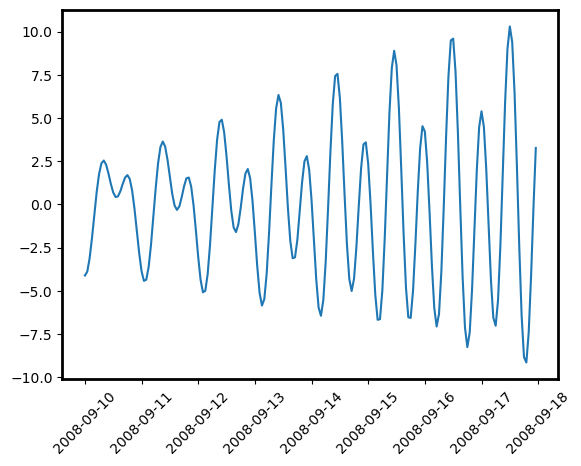

In [12]:
plt.figure()
plt.plot(dict_results["list_datetimes"], dict_results["tide_current_v_cm_per_s"])
plt.xticks(rotation=45)
plt.show()

In [13]:
# validate against the data from:
# https://www.nature.com/articles/s41597-020-00578-z/tables/2
# available at:
# https://arcticdata.io/catalog/view/doi:10.18739/A26M3340D
# we use the dataset for validation (from List_of_records.txt):
# bar_BSO3_a_rcm7_2008_09.nc
# note that by choosing the "unhide nested data", you can download files independently, instead of downloading a huge zip of all the files
# downloading 1 file independently is very recommended (I tried to download the huge zip, but it got corrupted and could not be extracted
# on each of my attempts)

# get the file
!wget https://arcticdata.io/metacat/d1/mn/v2/object/urn%3Auuid%3Ad5f179a3-76a8-4e4f-b45f-8e8d85960ba6
# rename the file
!mv urn\:uuid\:d5f179a3-76a8-4e4f-b45f-8e8d85960ba6 bar_BSO3_a_rcm7_2008_09.nc

--2023-08-29 13:29:56--  https://arcticdata.io/metacat/d1/mn/v2/object/urn%3Auuid%3Ad5f179a3-76a8-4e4f-b45f-8e8d85960ba6
Resolving arcticdata.io (arcticdata.io)... 128.111.85.224
Connecting to arcticdata.io (arcticdata.io)|128.111.85.224|:443... connected.
HTTP request sent, awaiting response... 200 200
Length: unspecified [application/netcdf]
Saving to: ‘urn:uuid:d5f179a3-76a8-4e4f-b45f-8e8d85960ba6’

urn:uuid:d5f179a3-7     [     <=>            ]   1,21M   754KB/s    in 1,6s    

2023-08-29 13:29:59 (754 KB/s) - ‘urn:uuid:d5f179a3-76a8-4e4f-b45f-8e8d85960ba6’ saved [1264327]



In [14]:
xr_obs = xr.open_dataset("./bar_BSO3_a_rcm7_2008_09.nc", drop_variables=["six_con", "all_con"])

In [15]:
xr_obs_pd_timestamp = pd.to_datetime([pd.Timestamp(timestamp) for timestamp in xr_obs["time"].data], utc=True)

In [16]:
df_xr_obs = pd.DataFrame({'utc_timestamp':xr_obs_pd_timestamp, 'xr_obs_u':xr_obs["u_tide_pred"].squeeze(), 'xr_obs_v':xr_obs["v_tide_pred"].squeeze()})

In [17]:
df_pytmd = pd.DataFrame({'utc_timestamp':dict_results["list_datetimes"], 'pytmd_u':dict_results["tide_current_u_cm_per_s"], 'pytmd_v':dict_results["tide_current_v_cm_per_s"]})

In [18]:
def get_mask(df_in, utc_timestamp_start, utc_timestamp_stop):
    mask = (df_in["utc_timestamp"] > utc_timestamp_start) & (df_in["utc_timestamp"] < utc_timestamp_stop) 
    return mask

In [19]:
# time window to plot for comparison
utc_timestamp_start = datetime.datetime(2008, 9, 10, 0, 0, 0, tzinfo=datetime.timezone.utc)
utc_timestamp_stop = datetime.datetime(2008, 9, 18, 0, 0, 0, tzinfo=datetime.timezone.utc)

mask_pytmd = get_mask(df_pytmd, utc_timestamp_start, utc_timestamp_stop)
mask_xr_obs = get_mask(df_xr_obs, utc_timestamp_start, utc_timestamp_stop)

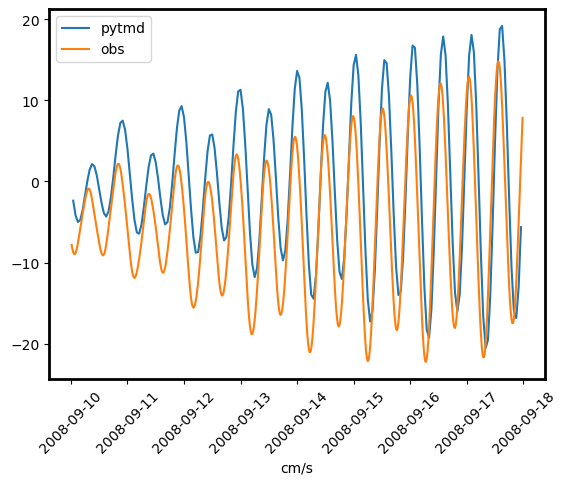

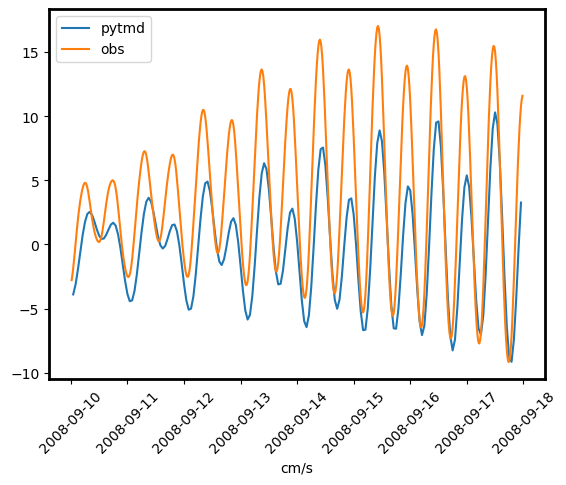

In [20]:
# plot by hand instead of with pandas (issue )
timestamp_pytmd = df_pytmd.loc[mask_pytmd]["utc_timestamp"].values
timestamp_xr_obs = df_xr_obs.loc[mask_xr_obs]["utc_timestamp"].values

u_pytmd = df_pytmd.loc[mask_pytmd]["pytmd_u"].values
u_xr_obs = df_xr_obs.loc[mask_xr_obs]["xr_obs_u"].values

v_pytmd = df_pytmd.loc[mask_pytmd]["pytmd_v"].values
v_xr_obs = df_xr_obs.loc[mask_xr_obs]["xr_obs_v"].values

plt.figure()
plt.plot(timestamp_pytmd, u_pytmd, label="pytmd")
plt.plot(timestamp_xr_obs, u_xr_obs, label="obs")
plt.xticks(rotation=45)
plt.xlabel("cm/s")
plt.legend()
plt.savefig("u_Barents_comparison.png")
plt.show()

plt.figure()
plt.plot(timestamp_pytmd, v_pytmd, label="pytmd")
plt.plot(timestamp_xr_obs, v_xr_obs, label="obs")
plt.xticks(rotation=45)
plt.xlabel("cm/s")
plt.legend()
plt.savefig("v_Barents_comparison.png")
plt.show()